In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tqdm import tqdm
import imutils

In [74]:
data = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training'
No_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/notumor'

glioma_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma'
meningioma_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma'
pituitary_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/pituitary'

In [75]:
dirlist=[No_tumor, glioma_tumor, meningioma_tumor, pituitary_tumor]
classes=['No', 'glioma', 'meningioma', 'pituitary']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths:', len(filepaths), '   labels:', len(labels))

filepaths: 5712    labels: 5712


In [76]:
filepaths[0]

'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/notumor\\Tr-noTr_0000.jpg'

In [114]:
rgb_images_array = []
gray_images_array = []

for i in filepaths:
  #reading the image
  img = imread(i)
  rgb_images_array.append(img)
  image = imread(i, cv2.IMREAD_GRAYSCALE)
  gray_images_array.append(image)

In [116]:
gray_images_array

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [77]:
# Files=pd.Series(filepaths, name='filepaths')
# Label=pd.Series(labels, name='labels')
# df=pd.concat([Files,Label], axis=1)
# df=pd.DataFrame(np.array(df), columns = ['filepaths', 'labels'])
# df

In [78]:
print(df['labels'].value_counts())

No            1595
pituitary     1457
meningioma    1339
glioma        1321
Name: labels, dtype: int64


In [79]:
# #visualize brain tumor images

# plt.figure(figsize=(20,10))
# for i in range(15):
#     random = np.random.randint(1,len(df))
#     print(df['filepaths'][i])
#     plt.subplot(3,5,i+1)
#     plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
#     plt.title(df.loc[random, "labels"], size = 15, color = "white") 
#     plt.xticks([])
#     plt.yticks([])
    
# plt.show()

In [80]:
images_array = []
for i in filepaths:
    #reading the image 
    image = imread(i, as_gray=True)
    images_array.append(image)
    
images_array



[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [

In [81]:
images = pd.Series(images_array, name='image')
Label = pd.Series(labels, name='labels')
df=pd.concat([images,Label], axis=1)
df=pd.DataFrame(np.array(df), columns = ['image', 'labels'])
df

,image,labels
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",No
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...",No
2,"[[0.023529411764705882, 0.023529411764705882, ...",No
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",No
4,"[[0.0392156862745098, 0.0392156862745098, 0.03...",No
...,...,...
5707,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",pituitary
5708,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",pituitary
5709,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",pituitary
5710,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",pituitary


In [82]:
pca = PCA(n_components=6) # we need 2 principal components.
converted_data = pca.fit(image)

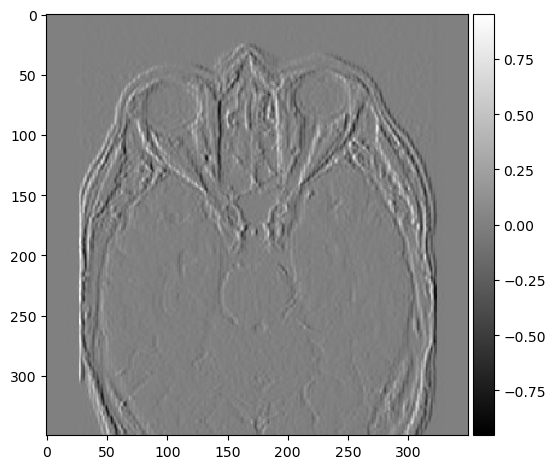

In [83]:
#reading the image 
image = imread(filepaths[0], as_gray=True)
# print(image)
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

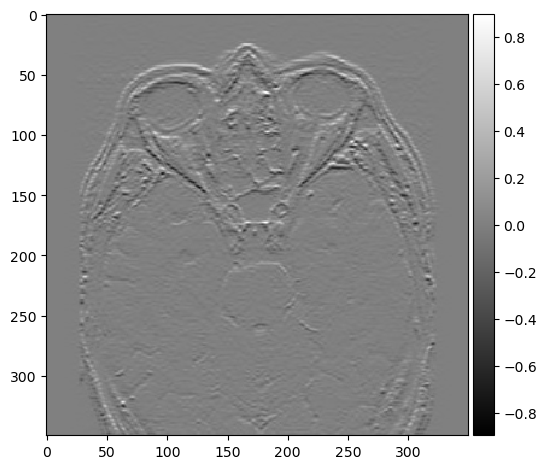

In [84]:
imshow(edges_prewitt_horizontal, cmap='gray')

In [85]:
# # Load the image in grayscale
# img = imread(filepaths[0], cv2.IMREAD_GRAYSCALE)

# # Divide the image into 8x8 blocks
# blocks = [img[j:j+8, i:i+8] for (j, i) in np.ndindex(img.shape[0]//8, img.shape[1]//8)]

# # Apply the DCT to each block
# dct_blocks = [cv2.dct(np.float32(block)) for block in blocks]

# # Keep only the most significant DCT coefficients
# kept_coeffs = [block[:4, :4].flatten() for block in dct_blocks]

# # Concatenate all feature vectors
# features = np.concatenate(kept_coeffs)

# print(features.shape)

In [86]:
# def crop_img(img):
#     """
#     Finds the extreme points on the image and crops the rectangular out of them
#     """
# #     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray = cv2.GaussianBlur(img, (3, 3), 0)

#     # threshold the image, then perform a series of erosions +
#     # dilations to remove any small regions of noise
#     thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thresh = cv2.erode(thresh, None, iterations=2)
#     thresh = cv2.dilate(thresh, None, iterations=2)

#     # find contours in thresholded image, then grab the largest one
#     cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cnts = imutils.grab_contours(cnts)
#     c = max(cnts, key=cv2.contourArea)

#     # find the extreme points
#     extLeft = tuple(c[c[:, :, 0].argmin()][0])
#     extRight = tuple(c[c[:, :, 0].argmax()][0])
#     extTop = tuple(c[c[:, :, 1].argmin()][0])
#     extBot = tuple(c[c[:, :, 1].argmax()][0])
#     ADD_PIXELS = 0
#     new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    
#     return new_img

In [87]:
# new_img = crop_img(image)

# imshow(new_img, cmap='gray')

In [88]:
#Import required modules
from sklearn.decomposition import PCA

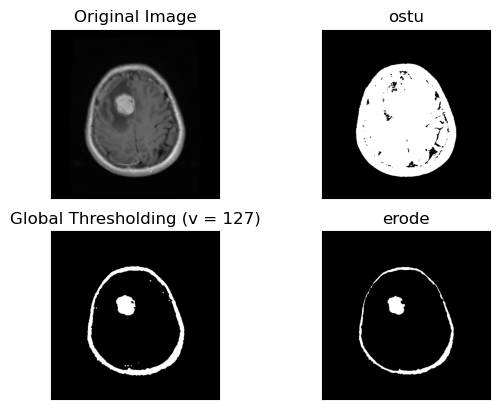

In [130]:
# file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0032.jpg'
file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0019.jpg'
image = imread(file)
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img = cv2.medianBlur(image,5)
# Convert the grayscale image to binary
# ret, binary = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,th1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
thresh = cv2.erode(th1, None, iterations=2)
# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# pca = PCA(n_components=6) # we need 2 principal components.
# converted_data = pca.fit(image)

# th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'ostu','Global Thresholding (v = 127)', 'erode' ]
images = [img, binary,th1, thresh ]
for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

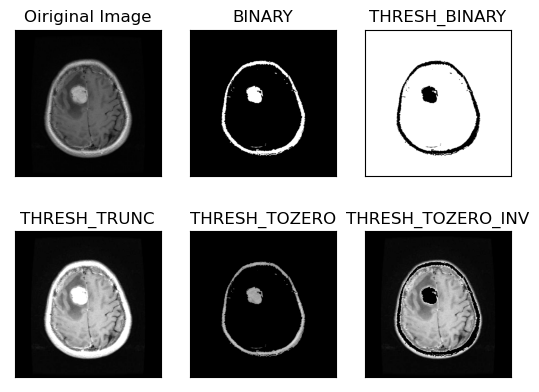

In [112]:
ret,thresh_binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
 
ret,thresh_binary_inv = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
 
ret,thresh_trunc = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
 
ret,thresh_tozero = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
 
ret,thresh_tozero_inv = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)
#DISPLAYING THE DIFFERENT THRESHOLDING STYLES using OpenCV
 
    
names = ['Oiriginal Image','BINARY','THRESH_BINARY','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
 
images = gray,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv
 
for i in range(6):
 
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
 
    plt.title(names[i])
 
    plt.xticks([]),plt.yticks([])

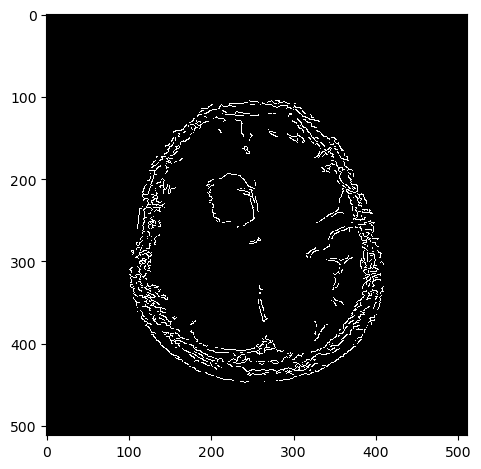

In [113]:
#calculate the edges using Canny edge algorithm
 
edges_of_image = cv2.Canny(image,100,200) 
 
#plot the edges
 
imshow(edges_of_image)

In [124]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy import ndimage as nd
from skimage.filters import sobel

In [134]:
# file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0032.jpg'
file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0019.jpg'
image = imread(file)
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

entropy_img = entropy(image, disk(1))
imshow(entropy_img)
print(entropy_img)
entropy1 = entropy_img.reshape(-1)
print(entropy1)

ValueError: Image dimensions and neighborhood dimensionsdo not match

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[0 0 0 ... 0 0 0]


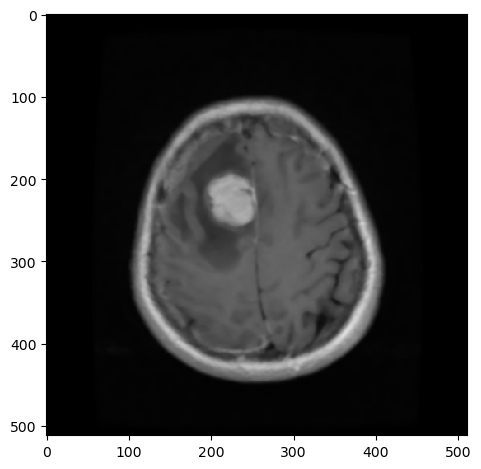

In [133]:
gaussian_img = nd.gaussian_filter(img, sigma=1)
imshow(gaussian_img)
print(gaussian_img)
gaussian_img1 = gaussian_img.reshape(-1)
print(gaussian_img1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


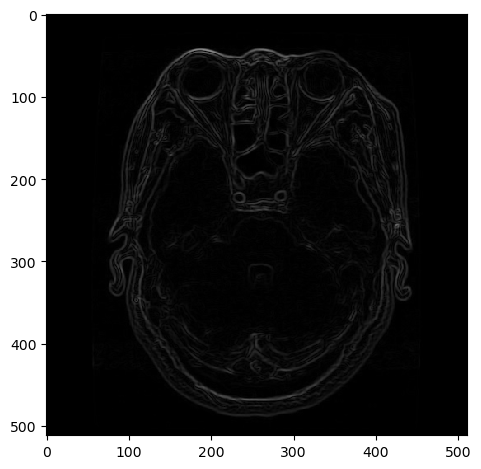

In [125]:
sobel_img = sobel(img)
imshow(sobel_img)
print(sobel_img)
sobel1 = sobel_img.reshape (-1)